---
**Classification of Bees**
---



---
**Importing Necessary Libraries**


In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import regularizers
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K
from keras import callbacks
import matplotlib.pyplot as plt



---
**Uploading Training and Test Sets and Assigning HyperParameters**


In [ ]:
img_width, img_height = 100, 100
  
train_dir = '/content/drive/MyDrive/DatasetReady/Train'
validation_dir = '/content/drive/MyDrive/DatasetReady/Test'
nb_train_samples =1000 
nb_validation_samples = 250
epochs = 50
batch_size = 32


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1. / 255) 
test_datagen = ImageDataGenerator(rescale = 1. / 255)
  
train_generator = train_datagen.flow_from_directory(train_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='binary') 
  
validation_generator = test_datagen.flow_from_directory( 
                                    validation_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='binary') 

Found 1000 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


---
**Building the Model (VGG16)**


In [ ]:
input_shape = (img_width, img_height, 3) 

model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001) )) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2), kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2),kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid'))

In [ ]:
model.summary()
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 32)        416       
_________________________________________________________________
activation (Activation)      (None, 99, 99, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        4128      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 64)        8

---
**Data Augmentation**

In [ ]:
dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1)



---



---



In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5, restore_best_weights = True)

---
**Model Training**

In [ ]:
model.fit_generator(train_generator, 
    steps_per_epoch = nb_train_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size,
    callbacks=[earlystopping]) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
31/31 [==============================] - 6s 92ms/step - loss: 0.7762 - accuracy: 0.5103 - val_loss: 0.7395 - val_accuracy: 0.6741
Epoch 2/50
31/31 [==============================] - 2s 79ms/step - loss: 0.7336 - accuracy: 0.5403 - val_loss: 0.6896 - val_accuracy: 0.6429
Epoch 3/50
31/31 [==============================] - 2s 79ms/step - loss: 0.7135 - accuracy: 0.5930 - val_loss: 0.6613 - val_accuracy: 0.6473
Epoch 4/50
31/31 [==============================] - 2s 76ms/step - loss: 0.6559 - accuracy: 0.6501 - val_loss: 0.6167 - val_accuracy: 0.7277
Epoch 5/50
31/31 [==============================] - 2s 78ms/step - loss: 0.6261 - accuracy: 0.7055 - val_loss: 0.5929 - val_accuracy: 0.7455
Epoch 6/50
31/31 [==============================] - 2s 77ms/step - loss: 0.5674 - accuracy: 0.7294 - val_loss: 0.5604 - val_accuracy: 0.7054
Epoch 7/50
31/31 [==============================] - 2s 76ms/step - loss: 0.5877 - accuracy: 0.7177 - val_loss: 0.5340 - val_accuracy: 0.7589
Epoch 8/50
31

---
**Visualizing History For Loss**

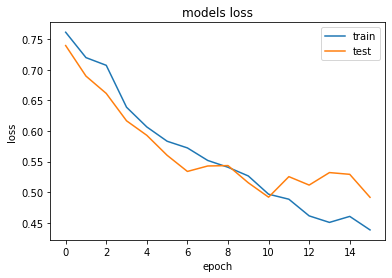

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('models loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

---
**Visualizing History For Accuracy**


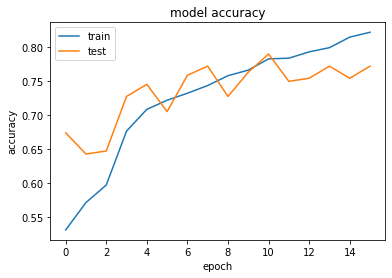

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()